<a href="https://colab.research.google.com/github/Lidivinekeng/Prediction_of_product_sales/blob/main/lidivine_kengne_sales_prediction_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prediction of product sales



*   Author : Lidivine Kengne



## project overview

predict the sale

##load and inspect data

### **Import Libraries**

In [681]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotlib
import matplotlib.pyplot as plt

## Preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram and transformers output pandas dataframes
set_config(transform_output='pandas')

from IPython.core.display import clear_output



In [682]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

### **Notebook Defaults and Runtime Configurations**

##### **Warnings**

In [683]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

##### **Pandas Display Configurations**

In [684]:
## Display all columns
pd.set_option('display.max_column', None)

##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

 - https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [685]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

### **Load the Data**

In [686]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [687]:
df_prediction = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/project/sales_predictions_2023 (1).csv"
df = pd.read_csv(df_prediction)

###.head()

In [688]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###.info()

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##clean data

1) How many rows and columns?

In [690]:
print (f'we have {len(df)}rows and {len(df.columns)}columns.')

we have 8523rows and 12columns.


2) What are the datatypes of each variable?

In [691]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) duplicates value

In [692]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

4) Identify missing values.

In [693]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [694]:
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [695]:
df[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [696]:
# Remake the list of string columns
string_cols = df.select_dtypes("object").columns
string_cols
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [697]:
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [698]:
# Replace "LF", "Low Fat"with "low fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"low fat", "Low Fat" :"low fat",})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [699]:
# Replace "Regular", with "reg "
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"Regular":"reg"})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [700]:
df_num = df.select_dtypes(exclude= ['object'])

In [701]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [702]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###drop the "Item_Identifier" feature because it has very high cardinality.

In [703]:
df = df.drop(columns=['Item_Identifier'])

##exploratory data analysis

#### Histograms to view the distributions of numerical features in your dataset

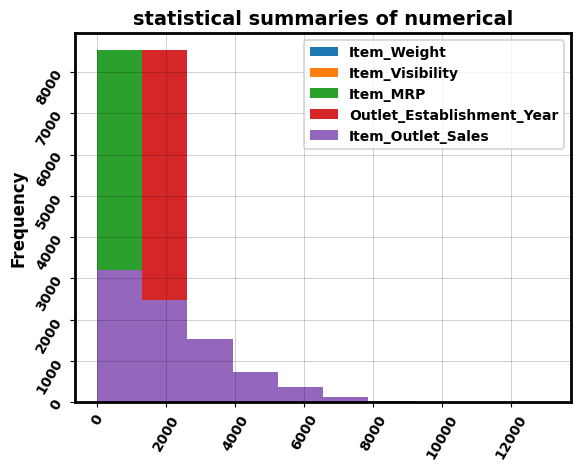

In [704]:
# Histograms to view the distributions of numerical features in your dataset
ax = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']].plot(kind= 'hist')
 ## Rotate the tick values
ax.tick_params(rotation = 60)

## Set the Title
ax.set_title('statistical summaries of numerical');

###Boxplots to view statistical summaries of numerical features in your dataset

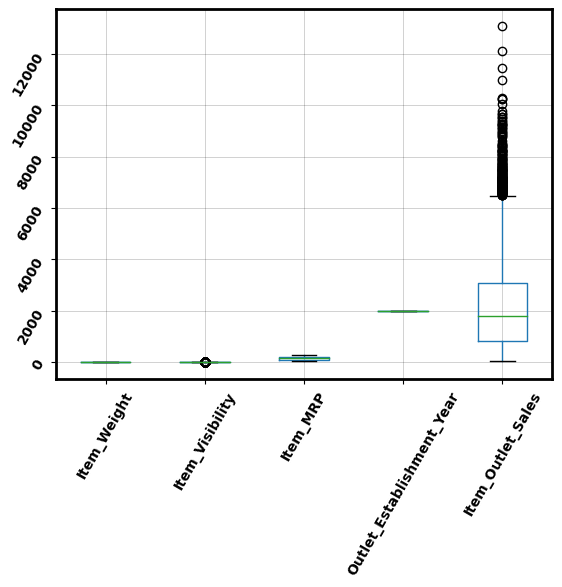

In [705]:
#Boxplots to view statistical summaries of numerical features in your dataset
## Create a boxplot
ax = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']].boxplot()
       ## Rotate the tick values
ax.tick_params(rotation = 60)


###Countplots to view the frequency of each class of categorial features in your dataset.

In [706]:
#define categorical
ca_cols = df.select_dtypes('object').columns
ca_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

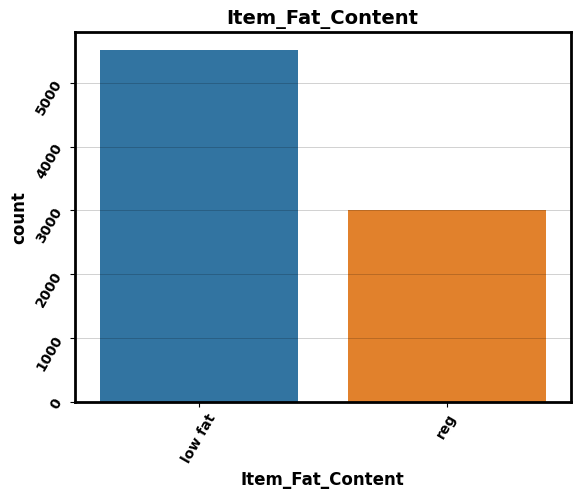

In [707]:
#Countplots to view item_fat_content
ax = sns.countplot(x = 'Item_Fat_Content' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Item_Fat_Content');

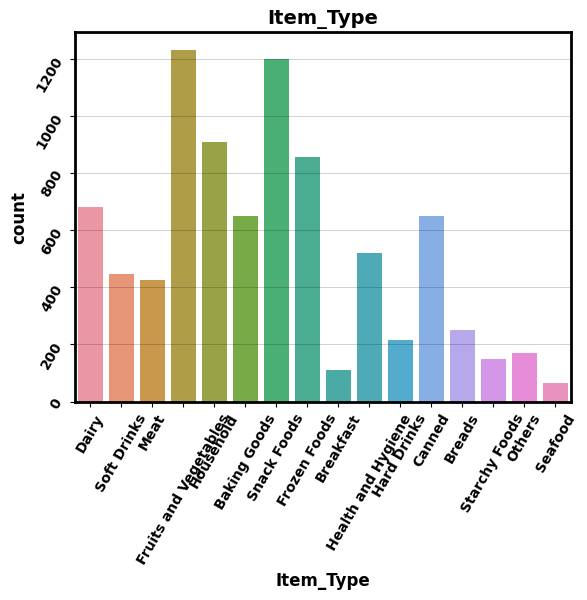

In [708]:
#Countplots to view for item_type
ax = sns.countplot(x = 'Item_Type' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Item_Type');

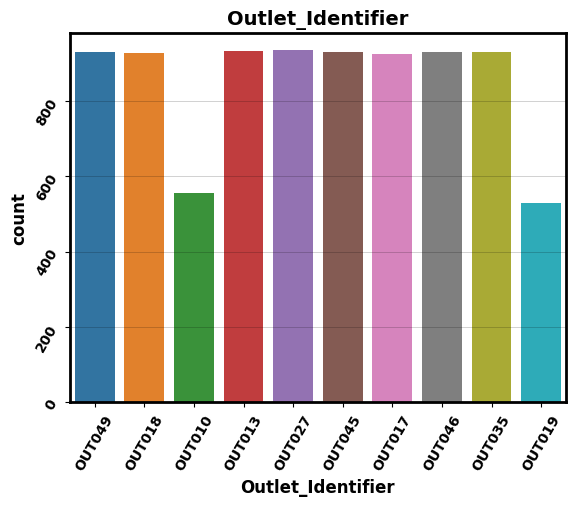

In [709]:
#Countplots to view for outlet_identifier
ax = sns.countplot(x = 'Outlet_Identifier' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Identifier');

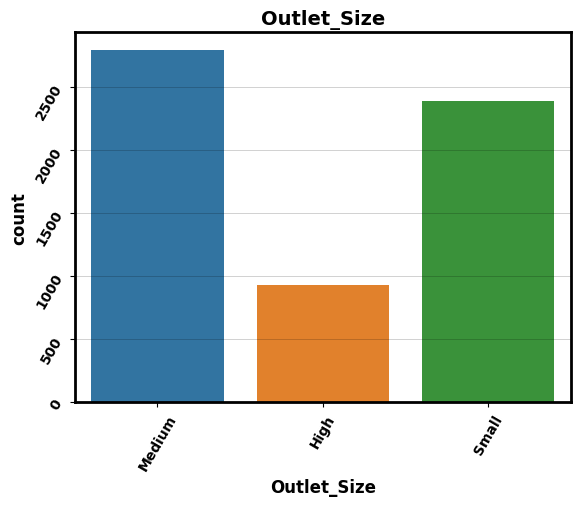

In [710]:
#Countplots to view for outlet_size
ax = sns.countplot(x = 'Outlet_Size', data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Size');

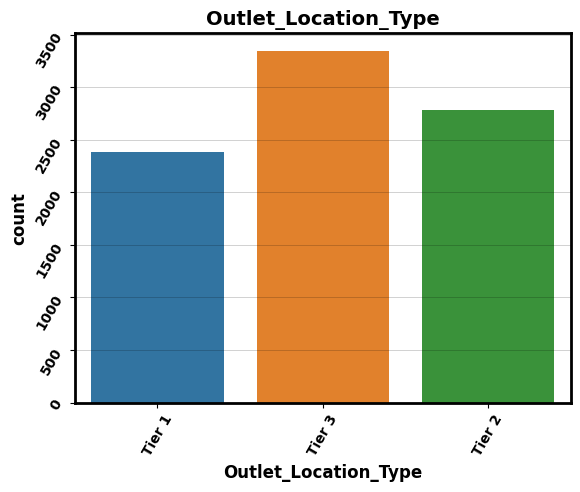

In [711]:
#Countplots to view for outlet_location_type
ax = sns.countplot(x = 'Outlet_Location_Type', data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title('Outlet_Location_Type');

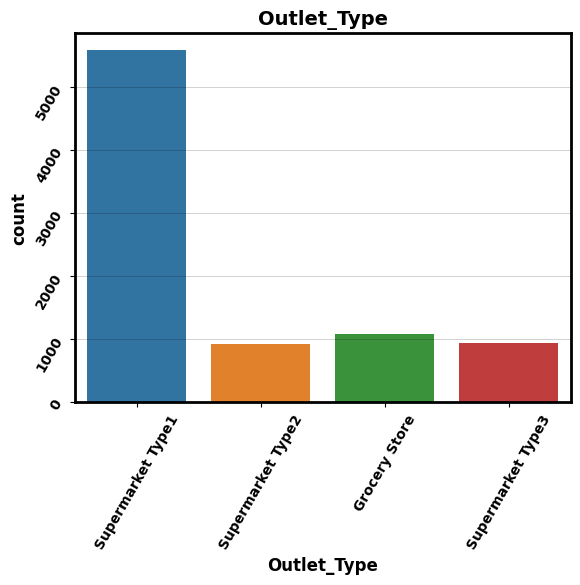

In [712]:
#Countplots to view for outlet_type
ax = sns.countplot(x = 'Outlet_Type' ,data = df)
## Rotate the tick values
ax.tick_params(rotation = 60)
## Set the Title
ax.set_title( 'Outlet_Type');

In [713]:
# Heatmap to view the correlation between features.
# Find correlations
corr = df.corr()
# tabular view of correlation values
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


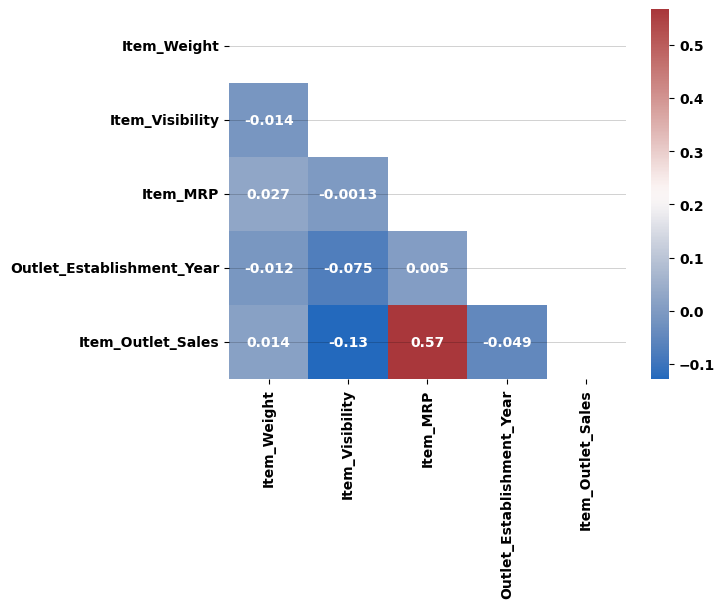

In [714]:
# Make a heatmap using the correlations from above
## Define a MatplotLib ax object using sns.heatmap()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, cmap= 'vlag', annot = True , mask = mask);

##### **Univariate Functions**

## Answer the following questions in a Markdown cell in your Colab Notebook:



- Define your target column:
  - item outlet sale


###### **Explore Univariate Categorical Function**

In [715]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### **Explore Univariate Numerical Function**

In [716]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


##### **Multivariate Functions**

###### **Explore Multivariate Categorical Function**

In [717]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

###### **Explore Multivariate Numerical Function**

In [718]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

##feature inspection

## Inspecting Each Feature

#### **Categorical Features**

###### **Store ID**




In [719]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Identifier'
df[feature].dtype

dtype('O')

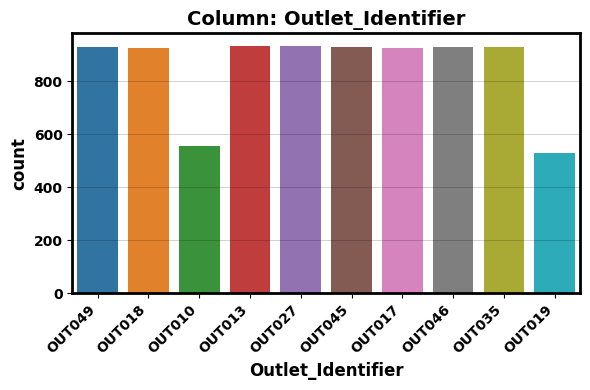

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [720]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (10) unique values (need to be more than 10)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

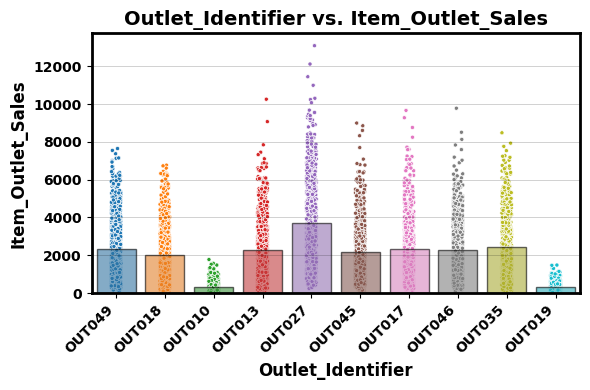

In [721]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

###### **Weight of product **




reg = regular fat

low fat = low fat

In [722]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

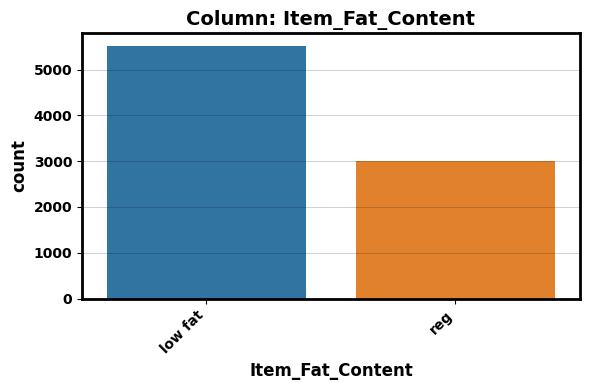

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [723]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (ordinal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (2) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

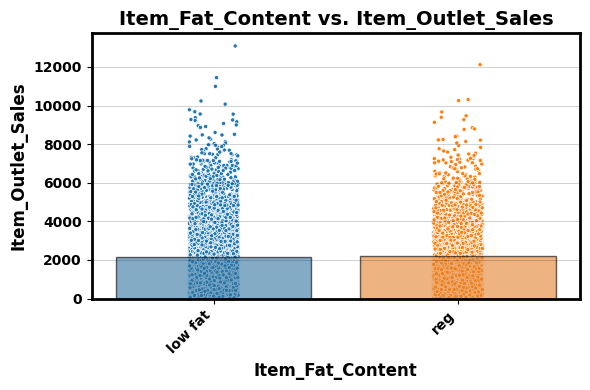

In [724]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

 1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

###### **The category to which the product belongs**




In [725]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Type'
df[feature].dtype

dtype('O')

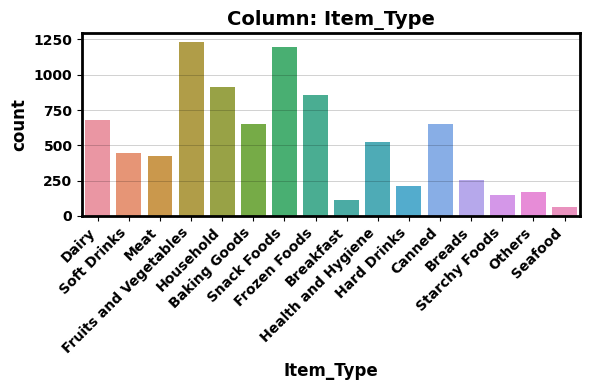

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [726]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - yes there (16) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

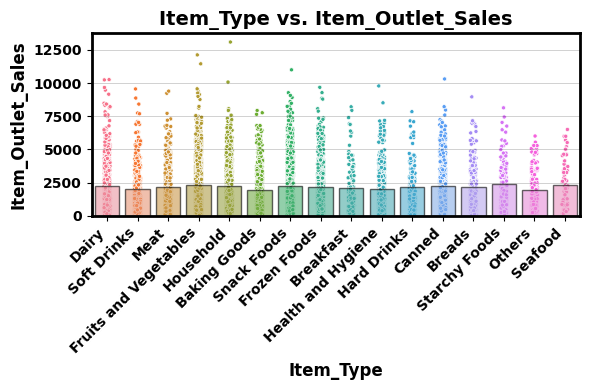

In [727]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

###### **The size of the store in terms of ground area covered**




In [728]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

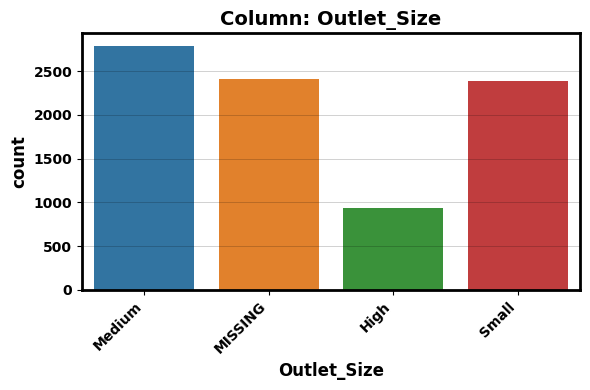

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [729]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (ordinal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 2410 missing values.or 28.28% . impute with the reseach (the pourcentage is considerable )
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (4) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - yes to much missing values

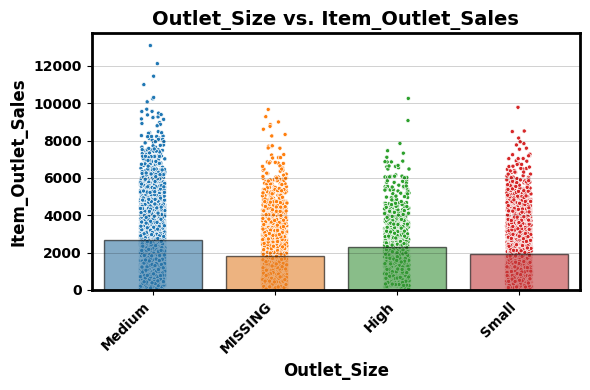

In [730]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

###### **The type of area in which the store is located**




In [731]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

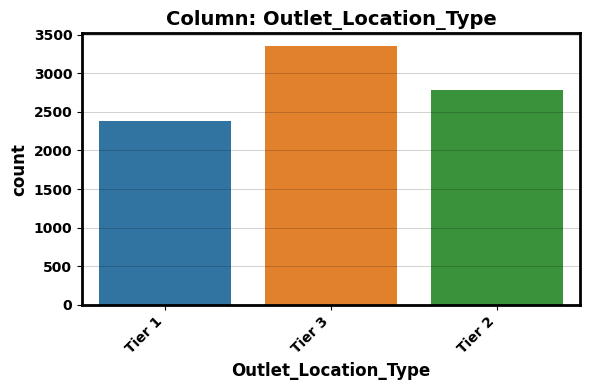

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [732]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - no there (03) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

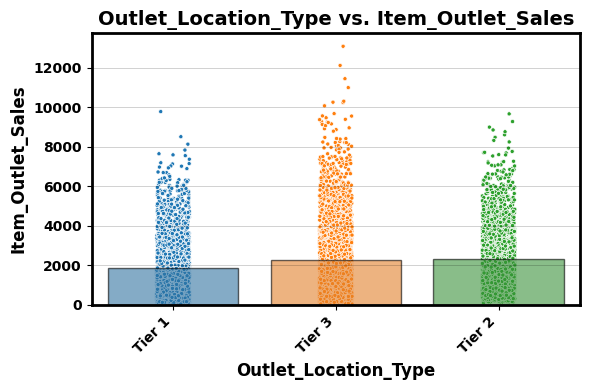

In [733]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

###### **Whether the outlet is a grocery store or some sort of supermarket**




In [734]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

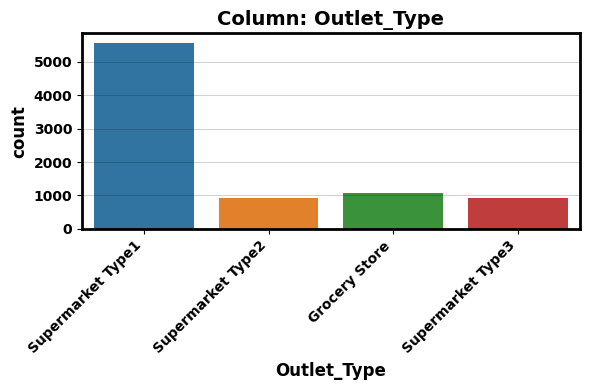

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [735]:
# Call Univariate Categorical EDA function
explore_categorical(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there (04) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

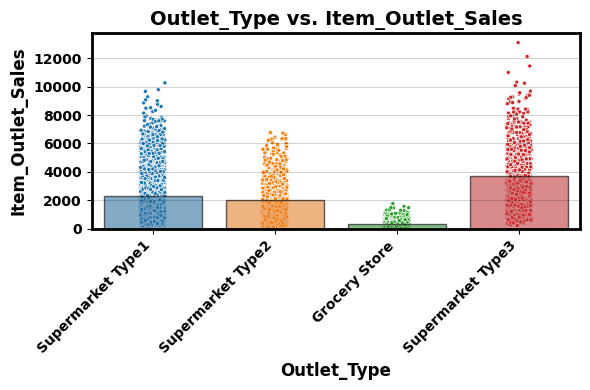

In [736]:
## Call Multivariate Categorical EDA function

plot_categorical_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of the target.

#### **Numerical Features**

###### **Weight of product**




In [737]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

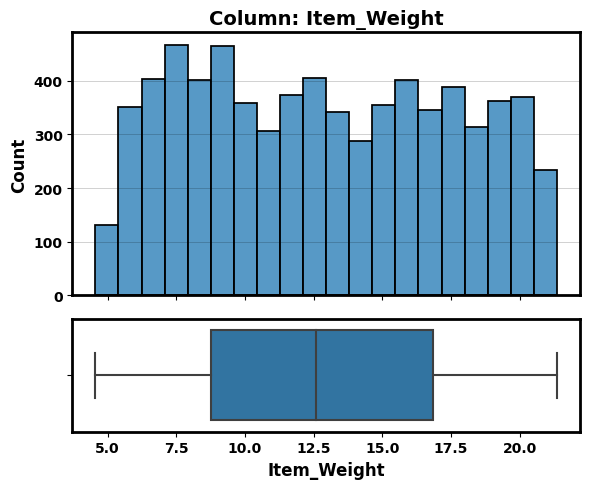

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [738]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 1463  null values, or 17.17% of values. impute with the reseach (the pourcentage is considerable )

3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.

4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)

5. Would we know this feature before the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes missing value.

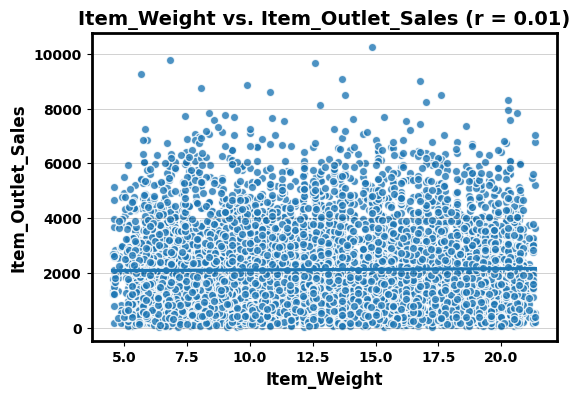

In [739]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes

2. Does this feature appear to be a predictor of the target?
  - no, there is a weak correlation (r = 0.01) between the feature and the target.it's important to conduct further analysis and evaluate other factors before concluding whether the feature is a predictor of the target

###### **The percentage of total display area of all products in a store allocated to the particular product**




In [740]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

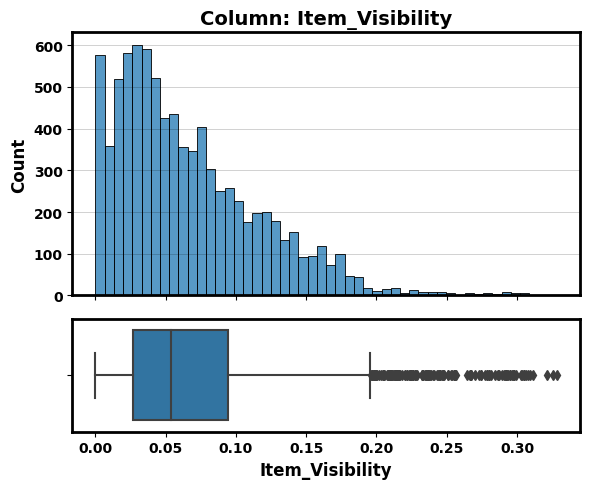

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [741]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values, or 0% of values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.

4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)

5. Would we know this feature before the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

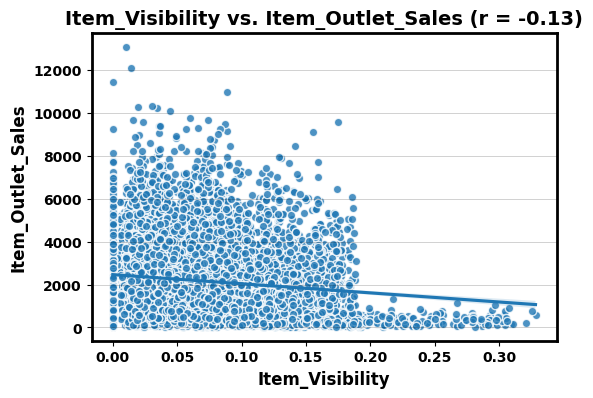

In [742]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes

2. Does this feature appear to be a predictor of the target?
  - Yes, there is a moderate negatif correlation (r = -0.13) between the feature and the target.

###### **Maximum Retail Price (list price) of the product**




In [743]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

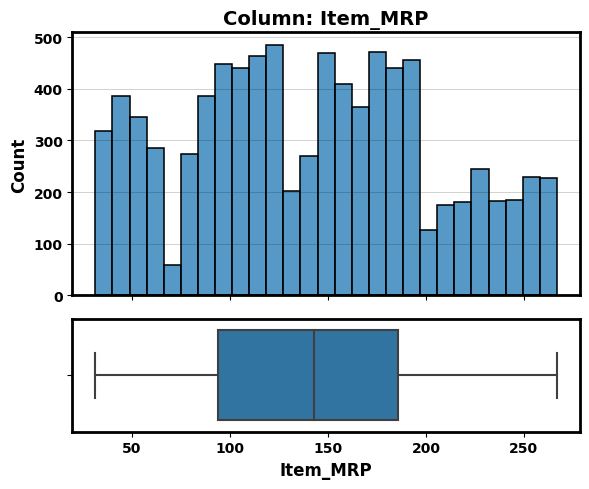

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [744]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values, or 0% of values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.

4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)

5. Would we know this feature before the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

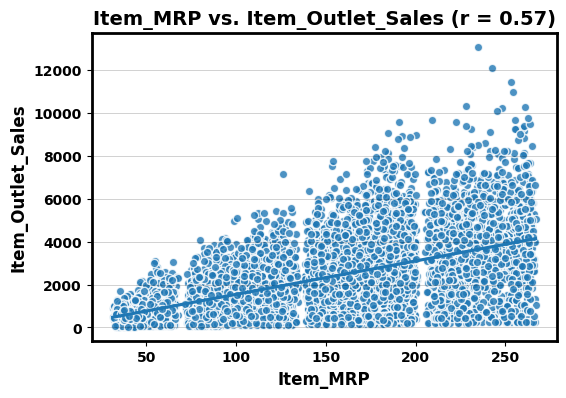

In [745]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes.

2. Does this feature appear to be a predictor of the target?
  - Yes, there is a positive correlation (r = 0.57) between the feature and the target.



###### **The year in which store was established**




In [746]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

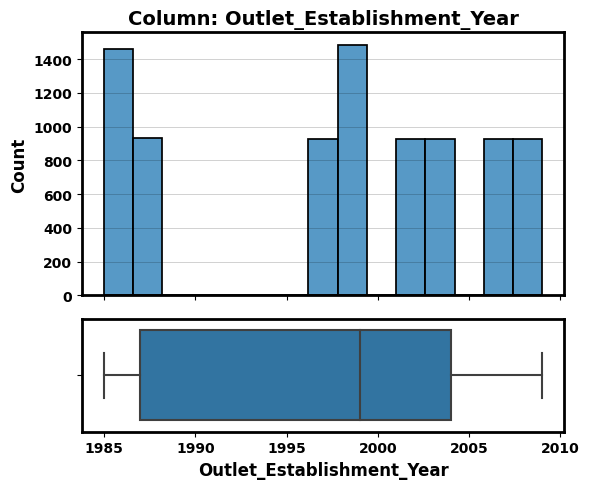

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [747]:
## Call Univariate Numerical EDA function
explore_numeric(df, feature);

**Feature Observations**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values, or 0% of values.

3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.

4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)

5. Would we know this feature before the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

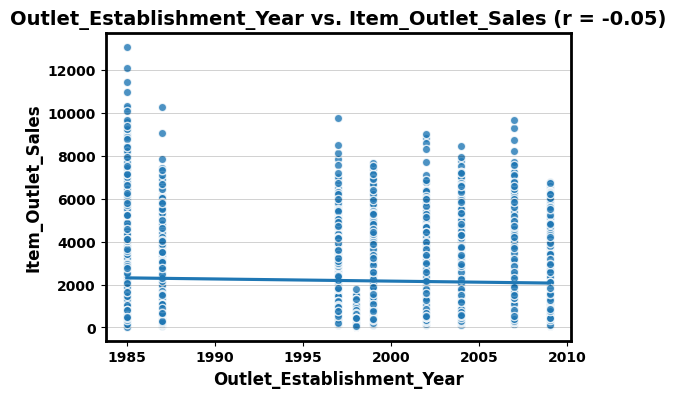

In [748]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, feature);

- **Feature vs. target( Sales of the product in the particular store Observations)**:

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes.

2. Does this feature appear to be a predictor of the target?
  - no, there is a weak correlation (r = 0.05) between the feature and the target.it's important to conduct further analysis and evaluate other factors before concluding whether the feature is a predictor of the target

##Separate your data into the feature matrix (X) and the target vector (y)

Define features (X) and target (y).

In [749]:
# Define features (X) and target (y).
# X should include every feature
# y should be 'Item_Identifier'

target = 'Item_Outlet_Sales'
X = df.drop(columns=[target , 'Item_Outlet_Sales'])
y = df[target]

##Train/test split the data. Please use the random number 42 for consistency

In [750]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Identify each feature as numerical, ordinal, or nominal.

In [751]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [752]:
# Checking object columns
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,low fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,reg,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,reg,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,low fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,low fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,reg,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,low fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,low fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


##Create a ColumnTransformer to preprocess the data

- **Ordinal**

In [753]:
# Prepare ordinal pipeline
ord_cols = ['Item_Fat_Content','Outlet_Size']


In [754]:


# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
Item_Fat_Content_order = ['low fat','reg']
Outlet_Size_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[Item_Fat_Content_order, Outlet_Size_order])

# Scaler
scaler = StandardScaler()

# make a pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['low fat', 'reg'],
                                            ['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [755]:
# Tuple ordinal
ord_tuple = ('ordinal', ord_pipe, ord_cols)

- **Nominal**

In [756]:
# Prepare nominal pipeline
nom_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [757]:
#tuple nomimal
nom_tuple =('Nominal',ohe_pipe ,nom_cols )

- **numeric**

In [758]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [759]:
#tuple numeric
num_tuple = ('numeric',numeric_pipe ,num_cols)

## Fit the column transformer object to the training data.

In [760]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, nom_tuple])


In [761]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('Nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])

## Save the transformed training data as X_train_processed

In [762]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [763]:
# Transform the X_train and the X_train
X_train_proc = preprocessor.transform(X_train)


##Display the .head() of X_train_processed

In [764]:
# Display the first (5) rows of the dataframe
display(X_train_proc.head())

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Fat_Content,ordinal__Outlet_Size,Nominal__Item_Type_Baking Goods,Nominal__Item_Type_Breads,Nominal__Item_Type_Breakfast,Nominal__Item_Type_Canned,Nominal__Item_Type_Dairy,Nominal__Item_Type_Frozen Foods,Nominal__Item_Type_Fruits and Vegetables,Nominal__Item_Type_Hard Drinks,Nominal__Item_Type_Health and Hygiene,Nominal__Item_Type_Household,Nominal__Item_Type_Meat,Nominal__Item_Type_Others,Nominal__Item_Type_Seafood,Nominal__Item_Type_Snack Foods,Nominal__Item_Type_Soft Drinks,Nominal__Item_Type_Starchy Foods,Nominal__Outlet_Identifier_OUT010,Nominal__Outlet_Identifier_OUT013,Nominal__Outlet_Identifier_OUT017,Nominal__Outlet_Identifier_OUT018,Nominal__Outlet_Identifier_OUT019,Nominal__Outlet_Identifier_OUT027,Nominal__Outlet_Identifier_OUT035,Nominal__Outlet_Identifier_OUT045,Nominal__Outlet_Identifier_OUT046,Nominal__Outlet_Identifier_OUT049,Nominal__Outlet_Location_Type_Tier 1,Nominal__Outlet_Location_Type_Tier 2,Nominal__Outlet_Location_Type_Tier 3,Nominal__Outlet_Type_Grocery Store,Nominal__Outlet_Type_Supermarket Type1,Nominal__Outlet_Type_Supermarket Type2,Nominal__Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.740321,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##Save the transformed testing data as X_ test_processed

In [765]:
# Transform the X_train and the X_test
X_test_proc = preprocessor.transform(X_test)

##Display the .head() of the X_test_processed

In [766]:
display(X_test_proc.head())

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Fat_Content,ordinal__Outlet_Size,Nominal__Item_Type_Baking Goods,Nominal__Item_Type_Breads,Nominal__Item_Type_Breakfast,Nominal__Item_Type_Canned,Nominal__Item_Type_Dairy,Nominal__Item_Type_Frozen Foods,Nominal__Item_Type_Fruits and Vegetables,Nominal__Item_Type_Hard Drinks,Nominal__Item_Type_Health and Hygiene,Nominal__Item_Type_Household,Nominal__Item_Type_Meat,Nominal__Item_Type_Others,Nominal__Item_Type_Seafood,Nominal__Item_Type_Snack Foods,Nominal__Item_Type_Soft Drinks,Nominal__Item_Type_Starchy Foods,Nominal__Outlet_Identifier_OUT010,Nominal__Outlet_Identifier_OUT013,Nominal__Outlet_Identifier_OUT017,Nominal__Outlet_Identifier_OUT018,Nominal__Outlet_Identifier_OUT019,Nominal__Outlet_Identifier_OUT027,Nominal__Outlet_Identifier_OUT035,Nominal__Outlet_Identifier_OUT045,Nominal__Outlet_Identifier_OUT046,Nominal__Outlet_Identifier_OUT049,Nominal__Outlet_Location_Type_Tier 1,Nominal__Outlet_Location_Type_Tier 2,Nominal__Outlet_Location_Type_Tier 3,Nominal__Outlet_Type_Grocery Store,Nominal__Outlet_Type_Supermarket Type1,Nominal__Outlet_Type_Supermarket Type2,Nominal__Outlet_Type_Supermarket Type3
7503,3.310089e-01,-0.776646,-0.998816,-1.293807,-0.740321,1.958796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892e+00,0.100317,-1.585194,-0.102145,-0.740321,-1.384048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,3.784469e-01,-0.482994,-1.595784,0.136187,1.350766,0.287374,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,4.213344e-16,-0.415440,0.506592,-1.532139,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-6.426567e-01,-1.047426,0.886725,0.732018,1.350766,-1.384048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [767]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('Nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])

## Save the transformed training data as X_train_processed

In [768]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [769]:
# Transform the X_train and the X_train
X_train_proc = preprocessor.transform(X_train)


##Save the transformed testing data as X_ test_processed

In [770]:
# Transform the X_train and the X_test
X_test_proc = preprocessor.transform(X_test)

##check

##Display the .head() of X_train_processed

In [771]:
# Display the first (5) rows of the dataframe
display(X_train_proc.head())

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Fat_Content,ordinal__Outlet_Size,Nominal__Item_Type_Baking Goods,Nominal__Item_Type_Breads,Nominal__Item_Type_Breakfast,Nominal__Item_Type_Canned,Nominal__Item_Type_Dairy,Nominal__Item_Type_Frozen Foods,Nominal__Item_Type_Fruits and Vegetables,Nominal__Item_Type_Hard Drinks,Nominal__Item_Type_Health and Hygiene,Nominal__Item_Type_Household,Nominal__Item_Type_Meat,Nominal__Item_Type_Others,Nominal__Item_Type_Seafood,Nominal__Item_Type_Snack Foods,Nominal__Item_Type_Soft Drinks,Nominal__Item_Type_Starchy Foods,Nominal__Outlet_Identifier_OUT010,Nominal__Outlet_Identifier_OUT013,Nominal__Outlet_Identifier_OUT017,Nominal__Outlet_Identifier_OUT018,Nominal__Outlet_Identifier_OUT019,Nominal__Outlet_Identifier_OUT027,Nominal__Outlet_Identifier_OUT035,Nominal__Outlet_Identifier_OUT045,Nominal__Outlet_Identifier_OUT046,Nominal__Outlet_Identifier_OUT049,Nominal__Outlet_Location_Type_Tier 1,Nominal__Outlet_Location_Type_Tier 2,Nominal__Outlet_Location_Type_Tier 3,Nominal__Outlet_Type_Grocery Store,Nominal__Outlet_Type_Supermarket Type1,Nominal__Outlet_Type_Supermarket Type2,Nominal__Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.740321,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##Display the .head() of the X_test_processed

In [772]:
display(X_test_proc.head())

,numeric__Item_Weight,numeric__Item_Visibility,numeric__Item_MRP,numeric__Outlet_Establishment_Year,ordinal__Item_Fat_Content,ordinal__Outlet_Size,Nominal__Item_Type_Baking Goods,Nominal__Item_Type_Breads,Nominal__Item_Type_Breakfast,Nominal__Item_Type_Canned,Nominal__Item_Type_Dairy,Nominal__Item_Type_Frozen Foods,Nominal__Item_Type_Fruits and Vegetables,Nominal__Item_Type_Hard Drinks,Nominal__Item_Type_Health and Hygiene,Nominal__Item_Type_Household,Nominal__Item_Type_Meat,Nominal__Item_Type_Others,Nominal__Item_Type_Seafood,Nominal__Item_Type_Snack Foods,Nominal__Item_Type_Soft Drinks,Nominal__Item_Type_Starchy Foods,Nominal__Outlet_Identifier_OUT010,Nominal__Outlet_Identifier_OUT013,Nominal__Outlet_Identifier_OUT017,Nominal__Outlet_Identifier_OUT018,Nominal__Outlet_Identifier_OUT019,Nominal__Outlet_Identifier_OUT027,Nominal__Outlet_Identifier_OUT035,Nominal__Outlet_Identifier_OUT045,Nominal__Outlet_Identifier_OUT046,Nominal__Outlet_Identifier_OUT049,Nominal__Outlet_Location_Type_Tier 1,Nominal__Outlet_Location_Type_Tier 2,Nominal__Outlet_Location_Type_Tier 3,Nominal__Outlet_Type_Grocery Store,Nominal__Outlet_Type_Supermarket Type1,Nominal__Outlet_Type_Supermarket Type2,Nominal__Outlet_Type_Supermarket Type3
7503,3.310089e-01,-0.776646,-0.998816,-1.293807,-0.740321,1.958796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892e+00,0.100317,-1.585194,-0.102145,-0.740321,-1.384048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,3.784469e-01,-0.482994,-1.595784,0.136187,1.350766,0.287374,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,4.213344e-16,-0.415440,0.506592,-1.532139,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-6.426567e-01,-1.047426,0.886725,0.732018,1.350766,-1.384048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Linear Regression Model

### Build a linear regression model.




In [773]:
## Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size']),
                                                 ('Nominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

### Use the custom evaluation function to get the metrics for your model (on training and test data).

In [774]:

 linear_df = evaluate_regression(linreg_pipe, X_train, y_train,
                          X_test, y_test,)
display(linear_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Regression Model,847.1052,804.1117,1139.1044,1092.8843,0.5616,0.5671


## Linear Regression Model Observations

- This model performs high bias
- and low variance .


### Random Forest Regressor Model

### Importing Random Forest Regressor

In [775]:
from sklearn.ensemble import RandomForestRegressor

### Fitting a Random Forest Regressor Model

In [776]:
## Create an instance of the model
rf_tree = RandomForestRegressor(max_depth=None, random_state = 42)
rf_tree_pipe = make_pipeline(preprocessor,rf_tree)
rf_tree_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                   'Outlet_Size']),
                                                 ('Nominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [777]:
random_df = evaluate_regression(rf_tree_pipe, X_train, y_train,
                          X_test, y_test,
                         model_name='Regression Model')
display(random_df)

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Regression Model,296.1737,767.1537,426.7847,1103.4119,0.9385,0.5587


##  Random Forest Model Observations
- we have a high variance.
- This model still has some bias. However, this model has improved performance on the training set.
-  This model performs extremely well on the training data. However, it performs poorly on the testing data.
- This model is definitely overfit and will need tuning.
- For the MAE the testing data is off by about 767.154.

##  Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.


In [778]:
## Create a range of values from 1 to max_depth to evaluate
depths = range(1, max_depth+1)
scores.index.name = 'Depth'

In [779]:
## Check params again
rf_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                                                 'High']])),
        

- define fonction

In [780]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


In [781]:
# Looking at options for tuning this model
rf_tree_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                                                 'High']])),
        

In [791]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'randomforestregressor__max_depth':range(1,max_depth+1)}

In [792]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_tree_pipe, param_grid, n_jobs = -1, verbose = 1)



In [793]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strat...
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(1, 41)},
             verbose=1)

In [794]:
# Obtain the best combination directly
grid_search.best_params_


{'randomforestregressor__max_depth': 5}

In [795]:
# Now define the best version of the model
best_model = grid_search.best_estimator_


In [787]:
# Predict and Evaluate with custom function
evaluate_regression(best_model, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 762.612
- MSE = 1,172,146.491
- RMSE = 1,082.657
- R^2 = 0.604

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.360
- MSE = 1,118,064.645
- RMSE = 1,057.386
- R^2 = 0.595


## Tuned Random Forest Model Observations
- Here, we see the best results as far as the regression metrics and the model's performance.
- This model still has some bias. However, this model has the best performance on the testing set.
- For the R^2 score 59.3% of the variance is explained.
- For the MAE the testing score is off by about 738.360

# Overall Recommendation

Data Science Insights
- For those who have an interst in Data Science:
  - Data Analytics Leads & Principal Data Engineers earn the most amount of money. However, this are usually not entry level careers and I would recommend going through a program, like Coding Dojo, where you can earn your data science certificate and then map out your career to these positions.

  - Data Engineers & Data Scientists have the most 100% remote positions. So, if you are wanting to work from home, or work from anywhere in the world, choosing one of the top five remote positions would be a good choice to build your career upon.
  
  - Lastly, the trend for the last three years show that data science and related fields are increasingly earning more money each year. So, choosing a career in one of these fields can be very lucrative.

Model Performance
- Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some bias in the model, but by far it outperformed the linear regression model.